# Movie Data Analysis

In [51]:
import pandas as pd
import sqlite3
import zipfile
import matplotlib.pyplot as plt

In [15]:
# upzip im.db.zip file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')
    

In [2]:
con = sqlite3.connect('zippedData/im.db')
cursor = con.cursor()


In [67]:
# check table names
shcema_df = pd.read_sql("""
                        SELECT *
                        FROM sqlite_master """, con)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Trying to find if there is any correlations between the budgets and ratings of the movies. There are three data frames I need, movie_raitng and movie_basics from im.db database as well as the budget from tn.movie_budgets.csv.gz.

In [68]:

df_rating = pd.read_sql("""
                        SELECT *
                        FROM movie_ratings """, con)
df_rating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [69]:
df_basics = pd.read_sql("""
                        SELECT 
                            movie_id,
                        FROM movie_basics """, con)
df_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [72]:
# Join two tables together, with both movie_id, movie name and averagerating
movie_titles_rating = pd.read_sql("""
                                    SELECT 
                                        movie_ratings.movie_id, movie_basics.primary_title AS movie, movie_ratings.averagerating 
                                    FROM 
                                        movie_ratings
                                        INNER JOIN movie_basics
                                            ON movie_ratings.movie_id = movie_basics.movie_id
                                    
                                    """, con)
movie_titles_rating.head(50)

,movie_id,movie,averagerating
0,tt10356526,Laiye Je Yaarian,8.3
1,tt10384606,Borderless,8.9
2,tt1042974,Just Inès,6.4
3,tt1043726,The Legend of Hercules,4.2
4,tt1060240,Até Onde?,6.5
5,tt1069246,Habana Eva,6.2
6,tt1094666,The Hammer,7.0
7,tt1130982,The Night Clerk,6.4
8,tt1156528,Silent Sonata,7.2
9,tt1161457,Vanquisher,4.2


Now I have a clean table to check both movie name and it corresponding rating. Next, I'm going to join this table with budget info.

In [14]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [38]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [73]:
# df_budgets.sort_values(by='production_budget')

In [74]:
# df_budgets['production_budget'][0][0]

In [18]:
budget_rating_df = pd.merge(movie_titles_rating,df_budgets, on='movie')
budget_rating_df.head(50)

,movie_id,averagerating,movie,id,release_date,production_budget,domestic_gross,worldwide_gross,budgets,dom_gross,world_gross
0,tt1043726,4.2,The Legend of Hercules,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",70000000,18848538,58953319
1,tt1094666,7.0,The Hammer,50,"Mar 21, 2008","$850,000","$442,638","$442,638",850000,442638,442638
2,tt3096900,6.5,The Hammer,50,"Mar 21, 2008","$850,000","$442,638","$442,638",850000,442638,442638
3,tt1171222,5.1,Baggage Claim,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",8500000,21569509,22885836
4,tt1210166,7.6,Moneyball,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",50000000,75605492,111300835
5,tt1212419,6.5,Hereafter,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",50000000,32746941,108660270
6,tt1232829,7.2,21 Jump Street,44,"Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429",42000000,138447667,202812429
7,tt1243974,5.4,Aloha,3,"May 29, 2015","$37,000,000","$21,052,030","$25,387,091",37000000,21052030,25387091
8,tt1261945,4.4,Sex and the City 2,16,"May 27, 2010","$95,000,000","$95,347,692","$294,680,778",95000000,95347692,294680778
9,tt1270761,5.6,Don't Be Afraid of the Dark,43,"Aug 26, 2011","$25,000,000","$24,046,682","$39,126,427",25000000,24046682,39126427


In [56]:
budget_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 11 columns):
movie_id             2875 non-null object
averagerating        2875 non-null float64
movie                2875 non-null object
id                   2875 non-null int64
release_date         2875 non-null object
production_budget    2875 non-null object
domestic_gross       2875 non-null object
worldwide_gross      2875 non-null object
budgets              2875 non-null int32
dom_gross            2875 non-null int32
world_gross          2875 non-null int64
dtypes: float64(1), int32(2), int64(2), object(6)
memory usage: 327.1+ KB


Text(0, 0.5, 'averagerating')

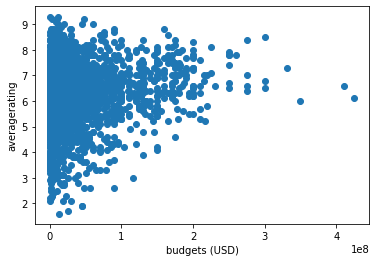

In [59]:
fig, ax = plt.subplots()
ax.scatter(x=budget_rating_df['budgets'], y=budget_rating_df['averagerating'])
ax.set_xlabel('budgets (USD)')
ax.set_ylabel('averagerating')

## Clean Budgets Table

In [27]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [28]:
"""All the numbers in this table need to be converted to integers"""

df_budgets['budgets(USD)'] = df_budgets['production_budget'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['dom_gross(USD)'] = df_budgets['domestic_gross'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['world_gross(USD)'] = df_budgets['worldwide_gross'].str.replace('$','').str.replace(',', '').astype('int64')

In [29]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747


In [31]:
# keep the int columns only
budget_clean = df_budgets.drop(['production_budget','domestic_gross','worldwide_gross'], axis=1)

In [32]:
budget_clean.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


## Join movie_basics and budget_clean

In [80]:
# load movie_basics from the database
df_basics = pd.read_sql("""
                        SELECT 
                            movie_id, primary_title AS movie, genres, runtime_minutes
                        FROM 
                            movie_basics """, con)

In [42]:
df_basics.loc[df_basics['movie']=='Avatar']

,movie,genres
17060,Avatar,Horror


In [81]:
#
movie_budget = budget_clean.merge(df_basics, on='movie')

In [82]:
movie_budget.head(50)

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0
5,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,"Action,Adventure,Fantasy",120.0
6,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,tt2379713,"Action,Adventure,Thriller",148.0
7,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,tt1345836,"Action,Thriller",164.0
8,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,tt3778644,"Action,Adventure,Fantasy",135.0
9,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,tt1210819,"Action,Adventure,Western",150.0


In [43]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 7 columns):
id                  3815 non-null int64
release_date        3815 non-null object
movie               3815 non-null object
budgets(USD)        3815 non-null int32
dom_gross(USD)      3815 non-null int32
world_gross(USD)    3815 non-null int64
genres              3743 non-null object
dtypes: int32(2), int64(2), object(3)
memory usage: 208.6+ KB


In [61]:
# check nan in genres
# movie_budget.loc[movie_budget['genres'].isna()]

In [78]:
# add a new column "Estimated Profit"
movie_budget['Estimated Profit'] = movie_budget['world_gross(USD)']-movie_budget['budgets(USD)']

In [79]:
movie_budget.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),genres,runtime_minutes,Estimated Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Horror,93.0,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",136.0,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi",113.0,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",141.0,1072413963
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",149.0,1748134200


In [94]:
df_directors = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            directors """, con)
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [95]:
df_person = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            persons """, con)
df_person.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [107]:
director_df = pd.read_sql("""
                            SELECT
                                d.movie_id, p.primary_name AS director_name
                            FROM 
                                directors AS d
                                INNER JOIN persons AS p
                                    ON d.person_id = p.person_id
                                """, con)
director_df.head()

,movie_id,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0835418,Jay Chandrasekhar
4,tt0878654,Albert Pyun


In [103]:
director_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291171 entries, 0 to 291170
Data columns (total 2 columns):
movie_id        291171 non-null object
primary_name    291171 non-null object
dtypes: object(2)
memory usage: 4.4+ MB


In [108]:
movie_df = movie_budget.merge(director_df, on='movie_id', how='inner')

In [112]:
movie_df.drop_duplicates(subset='movie_id',keep='first', inplace=True)

In [113]:
movie_clean_df = movie_df.drop_duplicates(subset='movie',keep='first')

In [114]:
movie_clean_df

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,Atsushi Wada
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,Rob Marshall
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,Simon Kinberg
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,Anthony Russo
42,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,"Action,Adventure,Fantasy",120.0,Zack Snyder
52,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,tt2379713,"Action,Adventure,Thriller",148.0,Sam Mendes
57,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,tt1345836,"Action,Thriller",164.0,Christopher Nolan
61,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,tt3778644,"Action,Adventure,Fantasy",135.0,Ron Howard
64,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,tt1210819,"Action,Adventure,Western",150.0,Gore Verbinski


In [115]:
movie_clean_df['Estimated Profit'] = movie_clean_df['world_gross(USD)']-movie_clean_df['budgets(USD)']

C:\Users\YueYu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
movie_clean_df.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,director_name,Estimated Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,Atsushi Wada,2351345279
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,Rob Marshall,635063875
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,Simon Kinberg,-200237650
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,1072413963
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,Anthony Russo,1748134200
